### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


In [92]:
df = pd.read_csv('data/winequality-red.csv')

In [93]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [94]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

<Axes: >

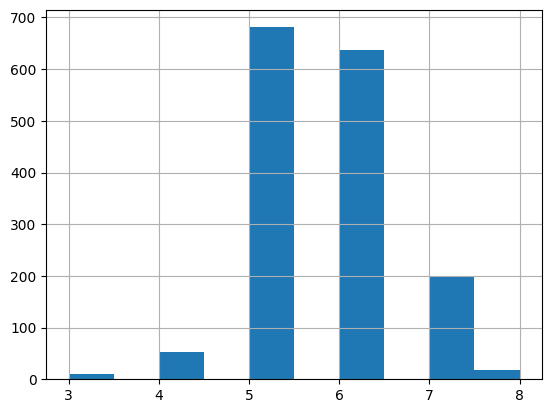

In [95]:
y.hist()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

best ridge alpha:  {'ridge__alpha': 109.85411419875584}


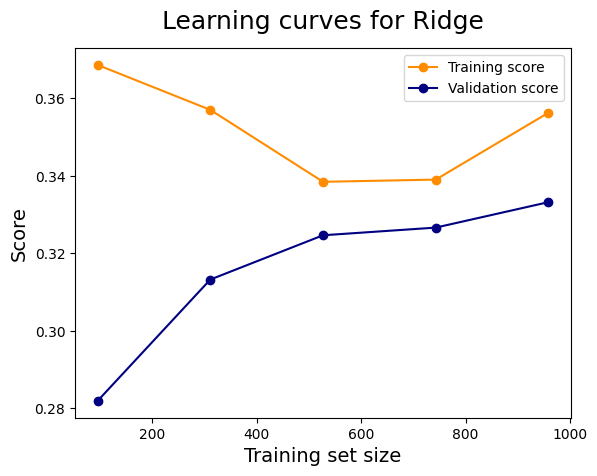

train mse:  0.42873840826512905
test mse:  0.3904626768229508
train score:  0.3528608249841376
test score:  0.3687898126630752


,feature,coefficient
0,fixed acidity,0.050438
1,volatile acidity,-0.165029
2,citric acid,-0.000712
3,residual sugar,0.018850
4,chlorides,-0.081739
5,free sulfur dioxide,0.037621
6,total sulfur dioxide,-0.108184
7,density,-0.056829
8,pH,-0.030539
9,sulphates,0.135779


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE

ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_coef = ridge_grid.best_estimator_.named_steps['ridge'].coef_
feature_names = ridge_grid.best_estimator_.named_steps['scaler'].get_feature_names_out()

ridge_df = pd.DataFrame({'feature': feature_names, 'coefficient': ridge_coef})
print("best ridge alpha: ", ridge_grid.best_params_)
train_mse = mean_squared_error(y_train, ridge_grid.predict(X_train))
score_train = ridge_grid.score(X_train, y_train)
test_mse = mean_squared_error(y_test, ridge_grid.predict(X_test))
score_test = ridge_grid.score(X_test, y_test)

train_sizes, train_scores, test_scores = learning_curve(
        ridge_grid,
        X_train,
        y_train
    )
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score",
             color="darkorange", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation score",
             color="navy", marker='o')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Ridge', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

print("train mse: ", train_mse)
print("test mse: ", test_mse)
print("train score: ", score_train)
print("test score: ", score_test)

ridge_df

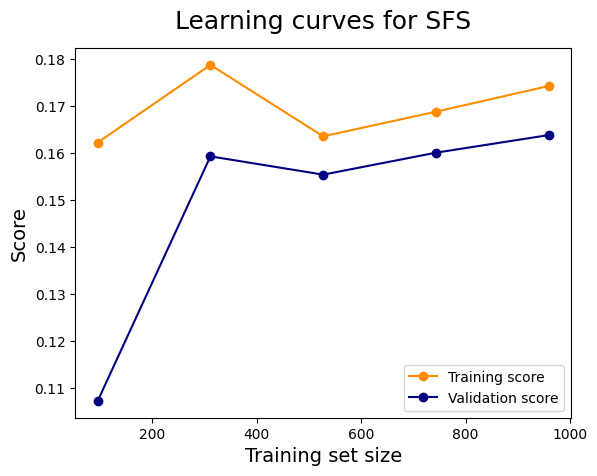

train mse:  0.5477973118099638
test mse:  0.5027384933740717
train score:  0.1731529212064763
test score:  0.18728811376760313


,feature,coefficient
0,fixed acidity,-0.009180
1,volatile acidity,-1.554005
2,citric acid,0.158089
3,total sulfur dioxide,-0.004515


In [98]:

sequential_lasso_pipe = Pipeline([
                           ('selector', SequentialFeatureSelector(Lasso(), 
                                                                  n_features_to_select=4)),
                           ('linreg', LinearRegression())])
sequential_lasso_pipe.fit(X_train, y_train)

sequential_lasso_coef = sequential_lasso_pipe.named_steps['linreg'].coef_
feature_names = sequential_lasso_pipe.named_steps['selector'].get_feature_names_out()
sequential_lasso_df = pd.DataFrame({'feature': feature_names, 'coefficient': sequential_lasso_coef})
train_mse = mean_squared_error(y_train, sequential_lasso_pipe.predict(X_train))
score_train = sequential_lasso_pipe.score(X_train, y_train)
test_mse = mean_squared_error(y_test, sequential_lasso_pipe.predict(X_test))
score_test = sequential_lasso_pipe.score(X_test, y_test)

train_sizes, train_scores, test_scores = learning_curve(
        sequential_lasso_pipe,
        X_train,
        y_train
    )
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score",
             color="darkorange", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation score",
             color="navy", marker='o')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for SFS', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

print("train mse: ", train_mse)
print("test mse: ", test_mse)
print("train score: ", score_train)
print("test score: ", score_test)

sequential_lasso_df

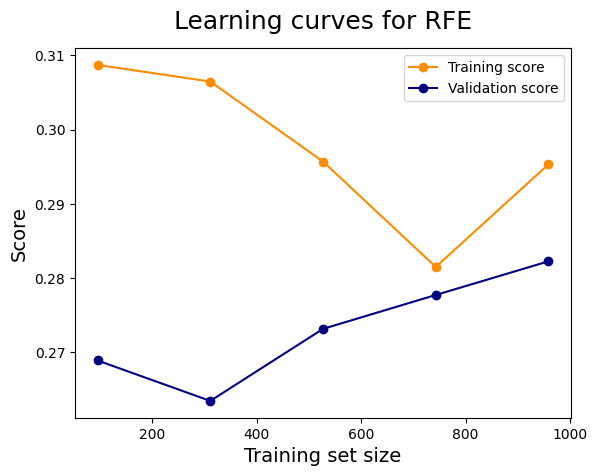

train mse:  0.4677700441355884
test mse:  0.44064560539477254
train score:  0.2939463443829299
test score:  0.2876656038073897


,feature,coefficient
0,total sulfur dioxide,-0.002896
1,pH,-0.535217
2,sulphates,0.802836
3,alcohol,0.355840


In [99]:

rfe_lasso_pipe = Pipeline([
                           ('selector', RFE(Lasso(), 
                                            n_features_to_select=4)),
                           ('linreg', LinearRegression())])
rfe_lasso_pipe.fit(X_train, y_train)
rfe_lasso_coef = rfe_lasso_pipe.named_steps['linreg'].coef_
feature_names = rfe_lasso_pipe.named_steps['selector'].get_feature_names_out()
rfe_lasso_df = pd.DataFrame({'feature': feature_names, 'coefficient': rfe_lasso_coef})
train_mse = mean_squared_error(y_train, rfe_lasso_pipe.predict(X_train))
score_train = rfe_lasso_pipe.score(X_train, y_train)
test_mse = mean_squared_error(y_test, rfe_lasso_pipe.predict(X_test))
score_test = rfe_lasso_pipe.score(X_test, y_test)
train_sizes, train_scores, test_scores = learning_curve(
        rfe_lasso_pipe,
        X_train,
        y_train
    )
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score",
             color="darkorange", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation score",
             color="navy", marker='o')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RFE', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

print("train mse: ", train_mse)
print("test mse: ", test_mse)
print("train score: ", score_train)
print("test score: ", score_test)
rfe_lasso_df